In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve
from importlib import reload
%matplotlib inline

Using TensorFlow backend.


In [2]:
sys.path.append('../odcd/cd/')

In [3]:
import model_symmetries as vsf

# Load Cifar

In [4]:
cifar = tf.keras.datasets.cifar10.load_data()

In [5]:
(x_train, y_train), (x_test, y_test) = cifar
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


# Load model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [10]:
def model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))

# Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    
    return model

In [11]:
model_cifar = model()

In [12]:
model_cifar.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 119us/step - loss: 1.7244 - acc: 0.3776 - val_loss: 1.4173 - val_acc: 0.4971
Epoch 2/10
50000/50000 [==============================] - 4s 75us/step - loss: 1.2789 - acc: 0.5486 - val_loss: 1.1054 - val_acc: 0.6103
Epoch 3/10
50000/50000 [==============================] - 4s 76us/step - loss: 1.0723 - acc: 0.6283 - val_loss: 1.2871 - val_acc: 0.5788
Epoch 4/10
50000/50000 [==============================] - 4s 76us/step - loss: 0.9407 - acc: 0.6715 - val_loss: 0.8443 - val_acc: 0.7077
Epoch 5/10
50000/50000 [==============================] - 4s 76us/step - loss: 0.8491 - acc: 0.7062 - val_loss: 0.7705 - val_acc: 0.7303
Epoch 6/10
50000/50000 [==============================] - 4s 75us/step - loss: 0.7867 - acc: 0.7270 - val_loss: 0.7849 - val_acc: 0.7302
Epoch 7/10
50000/50000 [==============================] - 4s 75us/step - loss: 0.7400 - acc: 0.7473 - val_loss: 0.7107 - val_ac

In [25]:
model_cifar.save('model_cifar.h5')

# Find symmetries

In [26]:
reload(vsf)

<module 'model_symmetries' from '../odcd/cd/model_symmetries.py'>

In [27]:
vae = vsf.VaeSymmetryFinderConv(model_cifar, input_shape=x_train.shape[1:], 
                            output_shape=(10, ), intermediate_dim=128, output_activation='sigmoid')

Vae
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 16, 16, 128)  3584        encoder_input[0][0]              
__________________________________________________________________________________________________
dropout_44 (Dropout)            (None, 16, 16, 128)  0           conv2d_17[0][0]                  
__________________________________________________________________________________________________
flatten_7 (Flatten)             (None, 32768)        0           dropout_44[0][0]                 
__________________________________________________________________________________________________
dense_

In [28]:
vae.fit(x_train, x_test=x_test, epochs=100)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 338us/step - loss: 1.5766 - val_loss: 1.3158
Epoch 2/100
50000/50000 [==============================] - 15s 302us/step - loss: 1.2972 - val_loss: 1.1549
Epoch 3/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.2160 - val_loss: 1.0876
Epoch 4/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.1634 - val_loss: 1.0525
Epoch 5/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.1439 - val_loss: 1.0179
Epoch 6/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.1131 - val_loss: 0.9971
Epoch 7/100
50000/50000 [==============================] - 15s 300us/step - loss: 1.0825 - val_loss: 1.0092
Epoch 8/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.0712 - val_loss: 0.9481
Epoch 9/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.04

Epoch 76/100
50000/50000 [==============================] - 15s 300us/step - loss: 0.7166 - val_loss: 0.6702
Epoch 77/100
50000/50000 [==============================] - 15s 300us/step - loss: 0.7275 - val_loss: 0.7009
Epoch 78/100
50000/50000 [==============================] - 15s 300us/step - loss: 0.7197 - val_loss: 0.6772
Epoch 79/100
50000/50000 [==============================] - 15s 299us/step - loss: 0.7184 - val_loss: 0.6661
Epoch 80/100
50000/50000 [==============================] - 15s 300us/step - loss: 0.7117 - val_loss: 0.6802
Epoch 81/100
50000/50000 [==============================] - 15s 301us/step - loss: 0.7134 - val_loss: 0.6699
Epoch 82/100
50000/50000 [==============================] - 15s 300us/step - loss: 0.7087 - val_loss: 0.6815
Epoch 83/100
50000/50000 [==============================] - 15s 301us/step - loss: 0.7107 - val_loss: 0.6886
Epoch 84/100
50000/50000 [==============================] - 15s 300us/step - loss: 0.7234 - val_loss: 0.6595
Epoch 85/100
50000/

In [29]:
i = 1500
x = x_test[i:i+1]

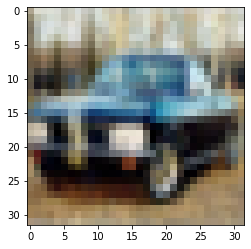

In [30]:
plt.imshow(np.squeeze(x))

In [31]:
model_pred = model_cifar.predict(x)
model_pred

array([[9.7774500e-06, 9.2618513e-01, 3.7770959e-10, 6.0630928e-10,
        2.3872421e-10, 1.7251886e-10, 5.5386595e-10, 2.1653039e-10,
        1.1926448e-07, 7.3804900e-02]], dtype=float32)

In [32]:
np.argmax(model_cifar.predict(x), axis=1)

array([1])

In [33]:
y_test[i:i+1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
outs_1 = vae.vae.predict(x)
outs_2 = vae.vae.predict(x)

In [35]:
symmetric_sample_1 = outs_1[0]
symmetric_sample_2 = outs_2[0]

orig_pred_1 = outs_1[1]
orig_pred_2 = outs_2[1]

trans_pred_1 = outs_1[2]
trans_pred_2 = outs_2[2]

In [36]:
orig_pred_1

array([[9.7774500e-06, 9.2618513e-01, 3.7770959e-10, 6.0630928e-10,
        2.3872421e-10, 1.7251886e-10, 5.5386595e-10, 2.1653039e-10,
        1.1926448e-07, 7.3804900e-02]], dtype=float32)

In [37]:
(model_pred == orig_pred_1).all()

True

In [38]:
trans_pred_1

array([[2.50644691e-04, 9.85953867e-01, 1.52509765e-05, 6.01878037e-06,
        2.62963363e-06, 4.15212435e-06, 7.10267886e-06, 9.37635434e-07,
        1.24983850e-03, 1.25094885e-02]], dtype=float32)

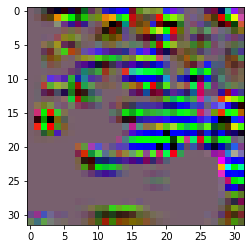

In [39]:
plt.imshow(np.squeeze(symmetric_sample_1))

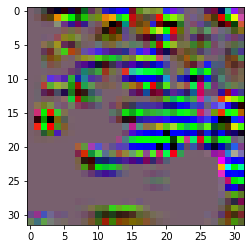

In [40]:
plt.imshow(np.squeeze(symmetric_sample_2))

# Test concept dirft

In [41]:
from scipy.ndimage import rotate
import pandas as pd
from scipy.stats import entropy

In [42]:
window = 100

In [43]:
def permute(x_test, nb_perm):
    i = np.random.choice(range(32), nb_perm, replace=False)
    i_prime = np.random.choice(range(32), nb_perm, replace=False)
    j = np.random.choice(range(32), nb_perm, replace=False)
    j_prime = np.random.choice(range(32), nb_perm, replace=False)
    if nb_perm == 0:
        k = np.random.choice(range(3), 0, replace=False)
        k_prime = np.random.choice(range(3), 0, replace=False)
    else:
        k = np.random.choice(range(3), 1, replace=False)
        k_prime = np.random.choice(range(3), 1, replace=False)
    
    x_perm = x_test.copy()
    
    x_perm[:, i, :, :] = x_test[:, i_prime, :, :]
    x_perm[:, :, j, :] = x_test[:, :, j_prime, :]
    x_perm[:, :, :, k] = x_test[:, :, :, k_prime]
    return x_perm

In [44]:
def sample_window(X_test, y_test, window):
    samples_rnd = np.random.choice(range(len(X_test)), window, replace=False)
    X_test_samples = X_test[samples_rnd, :]
    y_test_samples = y_test[samples_rnd]
    return X_test_samples, y_test_samples

In [45]:
cifar100 = tf.keras.datasets.cifar100.load_data()

In [46]:
(x_train_100, y_train_100), (x_test_100, y_test_100) = cifar100
print(x_train_100.shape, x_test_100.shape)
print(y_train_100.shape, y_test_100.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [47]:
x_train_100 = x_train_100.astype('float32')
x_test_100 = x_test_100.astype('float32')
x_train_100 /= 255
x_test_100 /= 255

In [48]:
accuracy_score(np.argmax(model_cifar.predict(x_test), axis=1), np.argmax(y_test, axis=1))

0.7843

In [49]:
accuracy_score(np.argmax(model_cifar.predict(x_test_100), axis=1), y_test_100)

0.0092

In [50]:
vae_outs_test = vae.vae.predict(x_test)
symm_samples_test = vae_outs_test[0]
orig_preds_test = vae_outs_test[1]
trans_preds_test = vae_outs_test[2]
    
kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
baseline_std_plus = kl_test.mean() + kl_test.std()
baseline_std_minus = kl_test.mean() - kl_test.std()

### contamination cifar100

In [51]:
y_test = np.argmax(y_test, axis=1)

In [52]:
y_test_100 = y_test_100.flatten()

In [53]:
x_test_100.shape

(10000, 32, 32, 3)

In [54]:
mean_test = []
std_test = []
accs_test = []
baseline_stds_plus = []
baseline_stds_minus = []
for step in range(100):
    if step < 99:
        x_window, y_window = sample_window(x_test, y_test, window)
        vae_outs_test = vae.vae.predict(x_window.reshape(x_window.shape[0], 32, 32, 3))
        symm_samples_test = vae_outs_test[0]
        orig_preds_test = vae_outs_test[1]
        trans_preds_test = vae_outs_test[2]
    
        kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
        mean_test.append(kl_test.mean())
        std_test.append(kl_test.std())
        preds_test = np.argmax(orig_preds_test, axis=1)
        accs_test.append(accuracy_score(preds_test, y_window))
    
        baseline_stds_plus.append(baseline_std_plus)
        baseline_stds_minus.append(baseline_std_minus)
    else:
        for i in range(0, len(x_test_100), 500):
            x_window, y_window = sample_window(x_test, y_test, window)
            rnd_idxs  = np.random.choice(range(len(x_test_100)), i)
    
            x_cont = x_test_100[rnd_idxs]
            y_cont = y_test_100[rnd_idxs]
    
            #print(len(rnd_idxs), y_test.shape, y_cont.shape)
            print('Number of contaminations: {} '.format(i))
            x_test_cont = np.concatenate((x_window, x_cont), axis=0)
            y_test_cont = np.concatenate((y_window, y_cont), axis=0)
            vae_outs_test = vae.vae.predict(x_test_cont.reshape(x_test_cont.shape[0], 32, 32, 3))
            symm_samples_test = vae_outs_test[0]
            orig_preds_test = vae_outs_test[1]
            trans_preds_test = vae_outs_test[2]
    
            kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
            mean_test.append(kl_test.mean())
            std_test.append(kl_test.std())
            preds_test = np.argmax(orig_preds_test, axis=1)
            accs_test.append(accuracy_score(preds_test, y_test_cont))
    
            baseline_stds_plus.append(baseline_std_plus)
            baseline_stds_minus.append(baseline_std_minus)

Number of contaminations: 0 
Number of contaminations: 500 
Number of contaminations: 1000 
Number of contaminations: 1500 
Number of contaminations: 2000 
Number of contaminations: 2500 
Number of contaminations: 3000 
Number of contaminations: 3500 
Number of contaminations: 4000 
Number of contaminations: 4500 
Number of contaminations: 5000 
Number of contaminations: 5500 
Number of contaminations: 6000 
Number of contaminations: 6500 
Number of contaminations: 7000 
Number of contaminations: 7500 
Number of contaminations: 8000 
Number of contaminations: 8500 
Number of contaminations: 9000 
Number of contaminations: 9500 


In [55]:
df = pd.DataFrame()
df['accuracy'] = accs_test
df['entropy_mean'] = mean_test
df['entropy_std'] = std_test
df['baseline_std_plus'] = baseline_stds_plus
df['baseline_std_minus'] = baseline_stds_minus

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73cb301c50>,
      dtype=object)

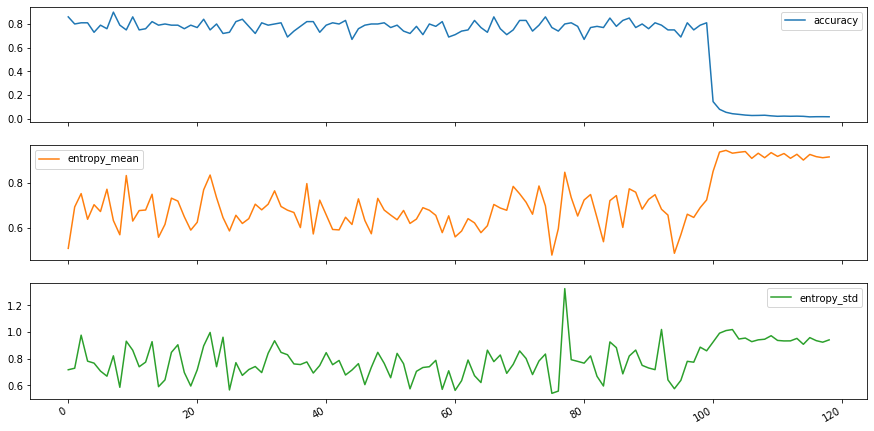

In [56]:
df[['accuracy','entropy_mean','entropy_std']].plot(logy = False, subplots=True, figsize = (15, 8))

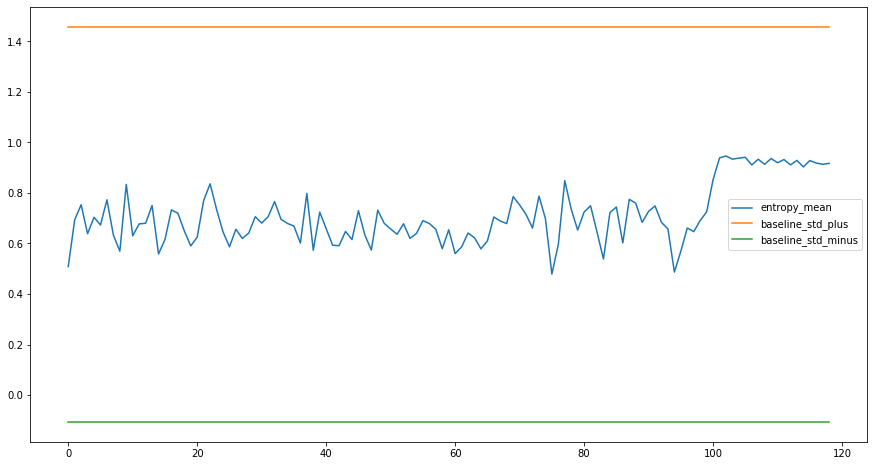

In [57]:
df[['entropy_mean', 'baseline_std_plus', 'baseline_std_minus']].plot(logy = False, subplots=False, figsize = (15, 8))

### Rotations

In [58]:
mean_test = []
std_test = []
accs_test = []
baseline_stds_plus = []
baseline_stds_minus = []
for step in range(100):
    if step < 99:
        x_window, y_window = sample_window(x_test, y_test, window)
        vae_outs_test = vae.vae.predict(x_window.reshape(x_window.shape[0], 32, 32, 3))
        symm_samples_test = vae_outs_test[0]
        orig_preds_test = vae_outs_test[1]
        trans_preds_test = vae_outs_test[2]
    
        kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
        mean_test.append(kl_test.mean())
        std_test.append(kl_test.std())
        preds_test = np.argmax(orig_preds_test, axis=1)
        accs_test.append(accuracy_score(preds_test, y_window))
    
        baseline_stds_plus.append(baseline_std_plus)
        baseline_stds_minus.append(baseline_std_minus)
    else:
        for i in range(45):
            x_window, y_window = sample_window(x_test, y_test, window)
            print('Rotating images by {} degree'.format(i))
            x_test_rot = rotate(x_window, i, axes=(1, 2), reshape=False)
    
            vae_outs_test = vae.vae.predict(x_test_rot.reshape(x_test_rot.shape[0], 32, 32, 3))
            symm_samples_test = vae_outs_test[0]
            orig_preds_test = vae_outs_test[1]
            trans_preds_test = vae_outs_test[2]
    
            kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
            mean_test.append(kl_test.mean())
            std_test.append(kl_test.std())
            preds_test = np.argmax(orig_preds_test, axis=1)
            accs_test.append(accuracy_score(preds_test, y_window))
    
            baseline_stds_plus.append(baseline_std_plus)
            baseline_stds_minus.append(baseline_std_minus)

Rotating images by 0 degree
Rotating images by 1 degree
Rotating images by 2 degree
Rotating images by 3 degree
Rotating images by 4 degree
Rotating images by 5 degree
Rotating images by 6 degree
Rotating images by 7 degree
Rotating images by 8 degree
Rotating images by 9 degree
Rotating images by 10 degree
Rotating images by 11 degree
Rotating images by 12 degree
Rotating images by 13 degree
Rotating images by 14 degree
Rotating images by 15 degree
Rotating images by 16 degree
Rotating images by 17 degree
Rotating images by 18 degree
Rotating images by 19 degree
Rotating images by 20 degree
Rotating images by 21 degree
Rotating images by 22 degree
Rotating images by 23 degree
Rotating images by 24 degree
Rotating images by 25 degree
Rotating images by 26 degree
Rotating images by 27 degree
Rotating images by 28 degree
Rotating images by 29 degree
Rotating images by 30 degree
Rotating images by 31 degree
Rotating images by 32 degree
Rotating images by 33 degree
Rotating images by 34 de

In [59]:
df = pd.DataFrame()
df['accuracy'] = accs_test
df['entropy_mean'] = mean_test
df['entropy_std'] = std_test
df['baseline_std_plus'] = baseline_stds_plus
df['baseline_std_minus'] = baseline_stds_minus

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73cb14de80>,
      dtype=object)

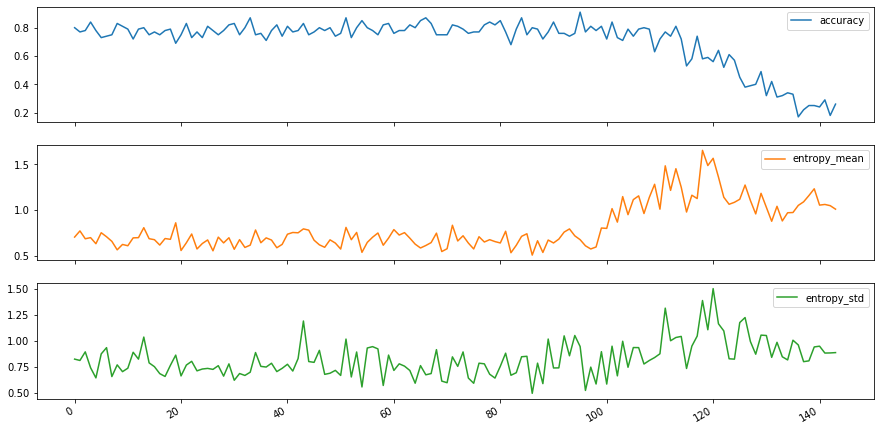

In [60]:
df[['accuracy','entropy_mean','entropy_std']].plot(logy = False, subplots=True, figsize = (15, 8))

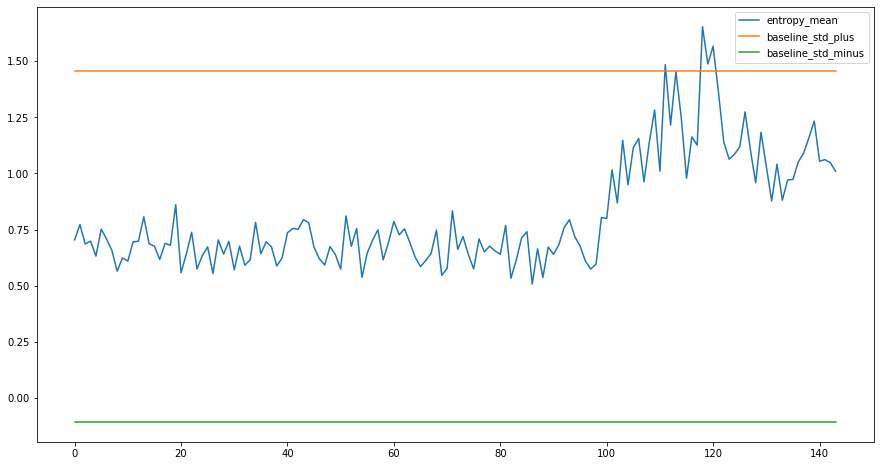

In [61]:
df[['entropy_mean', 'baseline_std_plus', 'baseline_std_minus']].plot(logy = False, subplots=False, figsize = (15, 8))

### Stream simulation features permutation

In [62]:
mean_test = []
std_test = []
accs_test = []
baseline_stds_plus = []
baseline_stds_minus = []

for step in range(100):
    if step < 99:
        x_window, y_window = sample_window(x_test, y_test, window)
        vae_outs_test = vae.vae.predict(x_window.reshape(x_window.shape[0], 32, 32, 3))
        symm_samples_test = vae_outs_test[0]
        orig_preds_test = vae_outs_test[1]
        trans_preds_test = vae_outs_test[2]
    
        kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
        mean_test.append(kl_test.mean())
        std_test.append(kl_test.std())
        preds_test = np.argmax(orig_preds_test, axis=1)
        accs_test.append(accuracy_score(preds_test, y_window))
    
        baseline_stds_plus.append(baseline_std_plus)
        baseline_stds_minus.append(baseline_std_minus)
    else:
        for nb_perm in range(32):
            x_window, y_window = sample_window(x_test, y_test, window)
            x_perm = permute(x_window, nb_perm)
    
            print('Nb of permutations: {}'.format(nb_perm))
            vae_outs_test = vae.vae.predict(x_perm.reshape(x_perm.shape[0], 32, 32, 3))
            symm_samples_test = vae_outs_test[0]
            orig_preds_test = vae_outs_test[1]
            trans_preds_test = vae_outs_test[2]
    
            kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
            mean_test.append(kl_test.mean())
            std_test.append(kl_test.std())
            preds_test = np.argmax(orig_preds_test, axis=1)
            accs_test.append(accuracy_score(preds_test, y_window))
    
            baseline_stds_plus.append(baseline_std_plus)
            baseline_stds_minus.append(baseline_std_minus)

Nb of permutations: 0
Nb of permutations: 1
Nb of permutations: 2
Nb of permutations: 3
Nb of permutations: 4
Nb of permutations: 5
Nb of permutations: 6
Nb of permutations: 7
Nb of permutations: 8
Nb of permutations: 9
Nb of permutations: 10
Nb of permutations: 11
Nb of permutations: 12
Nb of permutations: 13
Nb of permutations: 14
Nb of permutations: 15
Nb of permutations: 16
Nb of permutations: 17
Nb of permutations: 18
Nb of permutations: 19
Nb of permutations: 20
Nb of permutations: 21
Nb of permutations: 22
Nb of permutations: 23
Nb of permutations: 24
Nb of permutations: 25
Nb of permutations: 26
Nb of permutations: 27
Nb of permutations: 28
Nb of permutations: 29
Nb of permutations: 30
Nb of permutations: 31


In [63]:
df = pd.DataFrame()
df['accuracy'] = accs_test
df['entropy_mean'] = mean_test
df['entropy_std'] = std_test
df['baseline_std_plus'] = baseline_stds_plus
df['baseline_std_minus'] = baseline_stds_minus

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73c9f350f0>,
      dtype=object)

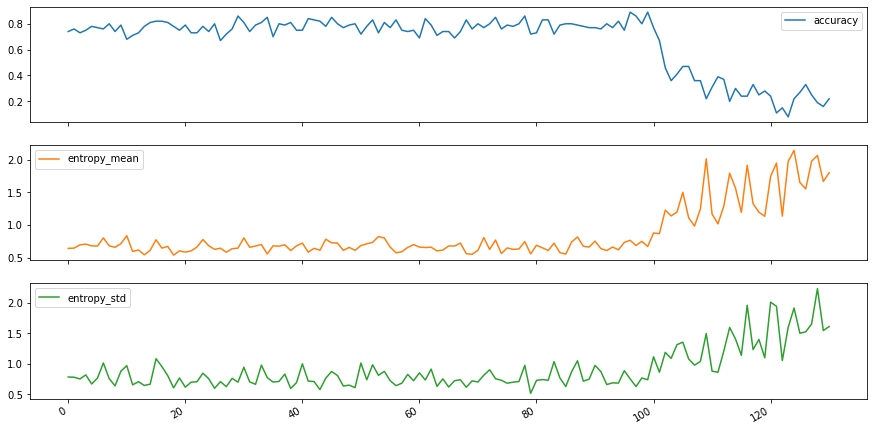

In [64]:
df[['accuracy','entropy_mean','entropy_std']].plot(logy = False, subplots=True, figsize = (15, 8))

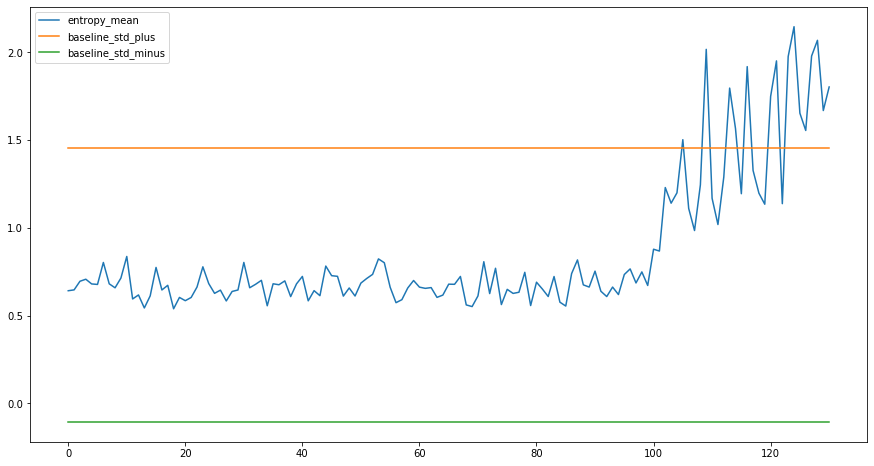

In [65]:
df[['entropy_mean', 'baseline_std_plus', 'baseline_std_minus']].plot(logy = False, subplots=False, figsize = (15, 8))

# ACDC

### random features permutation

In [93]:
x_test.shape

(10000, 32, 32, 3)

In [94]:
nb_features = 32 * 32 

In [95]:
nb_features

1024

In [96]:
mean_test = []
std_test = []
accs_test = []
baseline_stds_plus = []
baseline_stds_minus = []
for nb_perm in range(20):
    i = np.random.choice(range(32), nb_perm)
    i_prime = np.random.choice(range(32), nb_perm)
    j = np.random.choice(range(32), nb_perm)
    j_prime = np.random.choice(range(32), nb_perm)
    if nb_perm == 0:
        k = np.random.choice(range(3), 0)
        k_prime = np.random.choice(range(3), 0)
    else:
        k = np.random.choice(range(3), 1)
        k_prime = np.random.choice(range(3), 1)
    
    x_perm = x_test.copy()
    
    x_perm[:, i, :, :] = x_test[:, i_prime, :, :]
    x_perm[:, :, j, :] = x_test[:, :, j_prime, :]
    x_perm[:, :, :, k] = x_test[:, :, :, k_prime]
    
    print('Nb of permutations: {}'.format(nb_perm))
    vae_outs_test = vae.vae.predict(x_perm.reshape(x_perm.shape[0], 32, 32, 3))
    symm_samples_test = vae_outs_test[0]
    orig_preds_test = vae_outs_test[1]
    trans_preds_test = vae_outs_test[2]
    
    kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
    mean_test.append(kl_test.mean())
    std_test.append(kl_test.std())
    preds_test = np.argmax(orig_preds_test, axis=1)
    accs_test.append(accuracy_score(preds_test, y_test))
    
    baseline_stds_plus.append(baseline_std_plus)
    baseline_stds_minus.append(baseline_std_minus)

Nb of permutations: 0
Nb of permutations: 1
Nb of permutations: 2
Nb of permutations: 3
Nb of permutations: 4
Nb of permutations: 5
Nb of permutations: 6
Nb of permutations: 7
Nb of permutations: 8
Nb of permutations: 9
Nb of permutations: 10
Nb of permutations: 11
Nb of permutations: 12
Nb of permutations: 13
Nb of permutations: 14
Nb of permutations: 15
Nb of permutations: 16
Nb of permutations: 17
Nb of permutations: 18
Nb of permutations: 19


In [97]:
df = pd.DataFrame()
df['accuracy'] = accs_test
df['entropy_mean'] = mean_test
df['entropy_std'] = std_test
df['baseline_std_plus'] = baseline_stds_plus
df['baseline_std_minus'] = baseline_stds_minus

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f789b3705f8>,
      dtype=object)

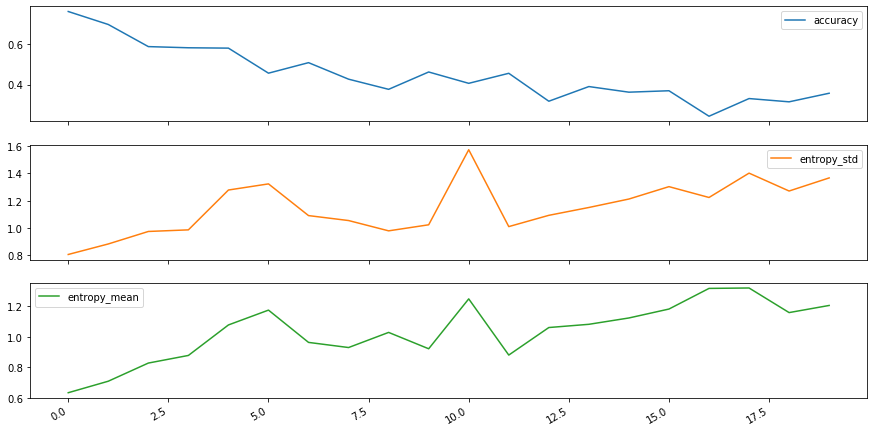

In [98]:
df[['accuracy','entropy_std','entropy_mean']].plot(logy = False, subplots=True, figsize = (15, 8))

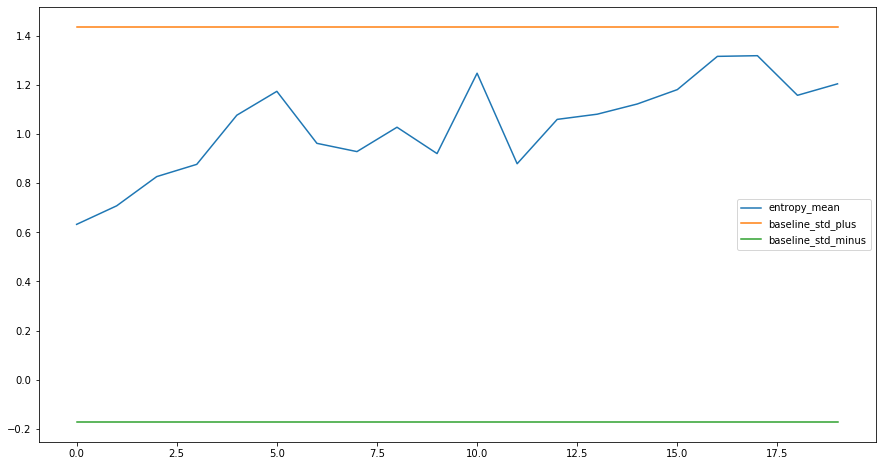

In [99]:
df[['entropy_mean', 'baseline_std_plus', 'baseline_std_minus']].plot(logy = False, subplots=False, figsize = (15, 8))

In [273]:
n

1987

In [301]:
i = np.random.choice(range(32), 0)
i_prime = np.random.choice(range(32), 0)
j = np.random.choice(range(32), 0)
j_prime = np.random.choice(range(32), 0)
k = np.random.choice(range(3), 0)
k_prime = np.random.choice(range(3), 0)

In [302]:
x_perm = x_test.copy()

In [303]:
(x_test == x_perm).all()

True

In [304]:
x_perm[:, i, :, :] = x_test[:, i_prime, :, :]
x_perm[:, :, j, :] = x_test[:, :, j_prime, :]
x_perm[:, :, :, k] = x_test[:, :, :, k_prime]

In [305]:
(x_test == x_perm).all()

True

In [290]:
j

array([ 5,  8,  8, 15, 13])

In [291]:
k

array([0])

In [295]:
x_test[:, i, :, :].shape

(10000, 5, 32, 3)

In [281]:
k = 32 % (32 * 32)

In [282]:
k

32

In [277]:
j = (2009 - (k * 32 * 32)) % 32

In [278]:
j

25

In [ ]:
i = (32 * 32) 